In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
stock = pd.read_csv("C:/AI/stock.csv")

In [6]:

stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [7]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']

In [36]:
stock['Volume'].value_counts()

Volume
0           21220
920            21
665            21
625            20
1056           20
            ...  
182870          1
514781          1
139767          1
11925916        1
2611843         1
Name: count, Length: 488923, dtype: int64

In [37]:
stock_AJ = stock[stock['Code']=='A060310']

In [38]:
stock_AJ = stock_AJ [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [39]:

stock_AJ

,Date,Open,High,Low,Close,Volume
0,20210601,2890,2970,2885,2920,166690
2000,20210602,2915,2975,2830,2900,134833
4000,20210603,2900,2925,2875,2900,144470
6000,20210604,2930,3120,2920,2950,934224
8000,20210607,3000,3150,2955,3150,946560
...,...,...,...,...,...,...
978000,20230523,2300,2315,2260,2285,117084
980000,20230524,2280,2300,2255,2280,67101
982000,20230525,2260,2285,2235,2245,91789
984000,20230526,2245,2915,2230,2910,13590249


In [40]:
stock_AJ['Volume'].value_counts()

Volume
166690      1
118855      1
239539      1
258495      1
267408      1
           ..
286240      1
172629      1
196850      1
132240      1
76952993    1
Name: count, Length: 494, dtype: int64

In [41]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [42]:
dfx = stock_AJ[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
0,0.362534,0.347349,0.420705,0.001621
2000,0.372311,0.349177,0.396476,0.001207
4000,0.366445,0.330896,0.416300,0.001332
6000,0.378178,0.402194,0.436123,0.011601
8000,0.405553,0.413163,0.451542,0.011761
...,...,...,...,...
978000,0.131795,0.107861,0.145374,0.000976
980000,0.123973,0.102377,0.143172,0.000326
982000,0.116152,0.096892,0.134361,0.000647
984000,0.110285,0.327239,0.132159,0.176155


In [43]:
dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.388270,0.371748,0.428200,0.011022
std,0.223416,0.216861,0.243649,0.053506
min,0.000000,0.000000,0.000000,0.000000
25%,0.158193,0.154022,0.174559,0.001332
50%,0.390888,0.384826,0.431718,0.002464
75%,0.534611,0.504113,0.583700,0.005128
max,1.000000,1.000000,1.000000,1.000000


In [44]:

# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [46]:
window_size = 8

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.09855299178339645, 0.08775137111196522, 0.11894273127229328, 0.0007246039889027013], [0.11028549080522936, 0.09872029250096087, 0.13656387664596636, 0.0011905842931963296], [0.13179507234525636, 0.10603290676029131, 0.1519823788479303, 0.0026100045850412784], [0.12983965584161755, 0.11517367458445435, 0.14096916298938464, 0.0014869269114462914], [0.13179507234525636, 0.10786106032512392, 0.14537444933280289, 0.0009760245403724937], [0.12397340633070109, 0.10237659963062609, 0.14317180616109376, 0.0003261433062557933], [0.11615174031614581, 0.09689213893612826, 0.1343612334742572, 0.0006471378025419926], [0.11028549080522936, 0.32723948810503695, 0.1321585903025481, 0.1761547272524533]] -> [0.39539347407311354]


In [47]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 486 486


In [48]:

train_size = int(len(data_y) * 0.6)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (291, 8, 4) (291, 1)
테스트 데이터의 크기 : (195, 8, 4) (195, 1)


In [49]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (340, 8, 4) (340, 1)
테스트 데이터의 크기 : (146, 8, 4) (146, 1)


In [56]:
plt.figure(figsize=(8,4))

plt.scatter(X_test['Volume'], dy_preds, c='g', label='dy_preds')
plt.show()    

NameError: name 'X_test' is not defined

<Figure size 800x400 with 0 Axes>

In [50]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN

In [51]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(8, 4)))
model.add(Dropout(0.1))
model.add(RNN(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

# 모델 초기화
model = Sequential()

# 첫 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True))
model.add(Dropout(0.5))

# 두 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu'))
model.add(Dropout(0.3))

# 최종 출력을 위한 Dense 레이어 추가
model.add(Dense(1))

# 모델 요약 출력
model.summary()

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


TypeError: RNN.__init__() missing 1 required positional argument: 'cell'

In [53]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(8, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 8, 20)               │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 20)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 20)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2769
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1850
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0970 
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0236 
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 
Epoch 9/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102
Epoch 10/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 
Epoch 11/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 
Epoch 12/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 
Epoch 13/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 
Epoch 14/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 
Epoch 15/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 
Epoch 16

In [ ]:
440page

In [8]:
stock['Name'].value_counts()

Name
3S         494
유화증권       494
이녹스        494
이노테라피      494
이노와이어리스    494
          ... 
바이브컴퍼니     494
바이넥스       494
바른손이앤에이    494
바른손        494
힘스         494
Name: count, Length: 2000, dtype: int64

In [9]:
stock_AJ = stock[stock['Code']=='A060310']

In [10]:
stock_AJ = stock_AJ [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [11]:

stock_AJ

,Date,Open,High,Low,Close,Volume
0,20210601,2890,2970,2885,2920,166690
2000,20210602,2915,2975,2830,2900,134833
4000,20210603,2900,2925,2875,2900,144470
6000,20210604,2930,3120,2920,2950,934224
8000,20210607,3000,3150,2955,3150,946560
...,...,...,...,...,...,...
978000,20230523,2300,2315,2260,2285,117084
980000,20230524,2280,2300,2255,2280,67101
982000,20230525,2260,2285,2235,2245,91789
984000,20230526,2245,2915,2230,2910,13590249


In [12]:
stock_AJ['Date'].value_counts()

Date
20210601    1
20221017    1
20221013    1
20221012    1
20221011    1
           ..
20220120    1
20220119    1
20220118    1
20220117    1
20230530    1
Name: count, Length: 494, dtype: int64

In [13]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [14]:
dfx = stock_AJ[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
0,0.362534,0.347349,0.420705,0.001621
2000,0.372311,0.349177,0.396476,0.001207
4000,0.366445,0.330896,0.416300,0.001332
6000,0.378178,0.402194,0.436123,0.011601
8000,0.405553,0.413163,0.451542,0.011761
...,...,...,...,...
978000,0.131795,0.107861,0.145374,0.000976
980000,0.123973,0.102377,0.143172,0.000326
982000,0.116152,0.096892,0.134361,0.000647
984000,0.110285,0.327239,0.132159,0.176155


In [15]:

dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.388270,0.371748,0.428200,0.011022
std,0.223416,0.216861,0.243649,0.053506
min,0.000000,0.000000,0.000000,0.000000
25%,0.158193,0.154022,0.174559,0.001332
50%,0.390888,0.384826,0.431718,0.002464
75%,0.534611,0.504113,0.583700,0.005128
max,1.000000,1.000000,1.000000,1.000000


In [16]:

# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [17]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.12006257332342345, 0.09506398537129565, 0.12995594713083897, 0.0003577772826598893], [0.10833007430159054, 0.0840950639823, 0.11233480175716587, 0.0009727870310734309], [0.09855299178339645, 0.08775137111196522, 0.11894273127229328, 0.0007246039889027013], [0.11028549080522936, 0.09872029250096087, 0.13656387664596636, 0.0011905842931963296], [0.13179507234525636, 0.10603290676029131, 0.1519823788479303, 0.0026100045850412784], [0.12983965584161755, 0.11517367458445435, 0.14096916298938464, 0.0014869269114462914], [0.13179507234525636, 0.10786106032512392, 0.14537444933280289, 0.0009760245403724937], [0.12397340633070109, 0.10237659963062609, 0.14317180616109376, 0.0003261433062557933], [0.11615174031614581, 0.09689213893612826, 0.1343612334742572, 0.0006471378025419926], [0.11028549080522936, 0.32723948810503695, 0.1321585903025481, 0.1761547272524533]] -> [0.39539347407311354]


In [18]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 484 484


In [19]:

train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN

In [21]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(RNN(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

# 모델 초기화
model = Sequential()

# 첫 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True))
model.add(Dropout(0.5))

# 두 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu'))
model.add(Dropout(0.3))

# 최종 출력을 위한 Dense 레이어 추가
model.add(Dense(1))

# 모델 요약 출력
model.summary()

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


TypeError: RNN.__init__() missing 1 required positional argument: 'cell'

In [22]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 10, 20)              │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1746
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0547
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0255
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148
Epoch 9/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132
Epoch 10/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123
Epoch 11/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105
Epoch 12/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117
Epoch 13/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113
Epoch 14/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129
Epoch 15/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122
Epoch 16/70
12/12 ━

In [26]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.005293214561897763


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


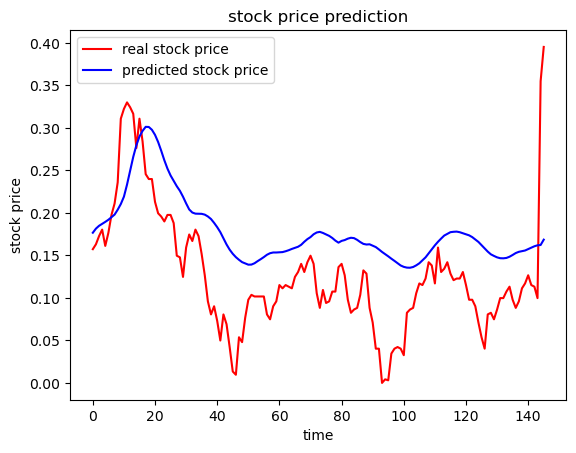

In [27]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()